# Lab 10
## Week 10 Data analysis 3

In this lab you will mainly learn and practice data analysis using K-means clustering. Kmeans clustering is a very popular clustering algorithm (belonging to the family of
Unsupervised Learning) that aims to partition observations into k clusters.

K-Means falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the centre of a cluster. In centroid-based clustering, clusters are represented by a central vector or a centroid.

### Task 1: K-means Clustering with scikit-learn

In this task, you will practice how to implement K-means clustering in Python with scikit-learn.

Jupyter Notebook is used in this task, while you can use Spyder, Jupyter Notebook or any other python development environments you prefer.


1. Import the required libraries

In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

%matplotlib inline

2. Generate a new dataset using make_blobs function

In [38]:
# creating a sample dataset with 4 cluster

x, y = make_blobs(n_samples=800, n_features=3, centers=4)


3. Plot the dataset

C:\Users\every\AppData\Local\Temp/ipykernel_14188/3569611631.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


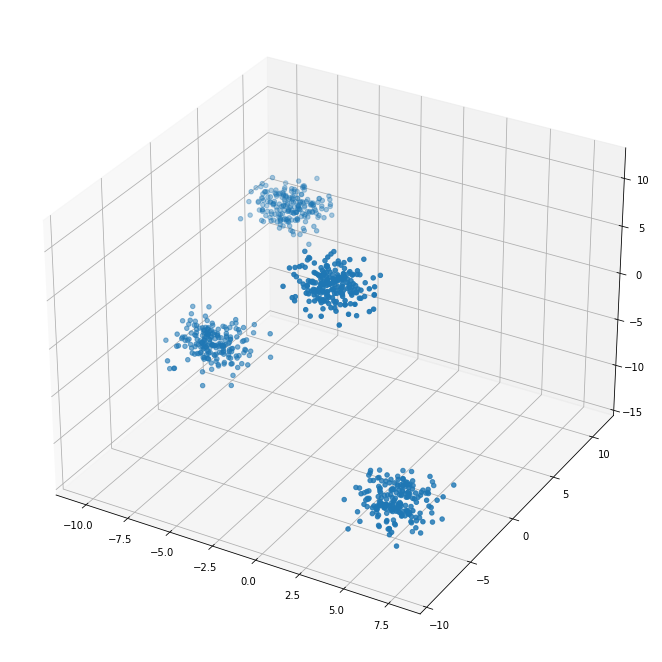

In [39]:
# Plot the dataset
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], x[:, 2])

4. Create a K-means clustering model (let us set cluster number K=3) using the Kmeans clustering class provided by sklearn library.

Use the ‘fit’ function and pass the generated data as parameter to fit the Kmeans clustering model

In [40]:
# Initializing KMeans
k = 3
kmeans = KMeans(n_clusters = k)

# Fitting with inputs
kmeans = kmeans.fit(x)

5. Get the cluster centres. Predict the cluster for each sample point. 

In [41]:
# Getting the cluster centers
C = kmeans.cluster_centers_

# Predicting the clusters
labels = kmeans.predict(x)

6. Visualize the clusters and centroids

C:\Users\every\AppData\Local\Temp/ipykernel_14188/2809176906.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


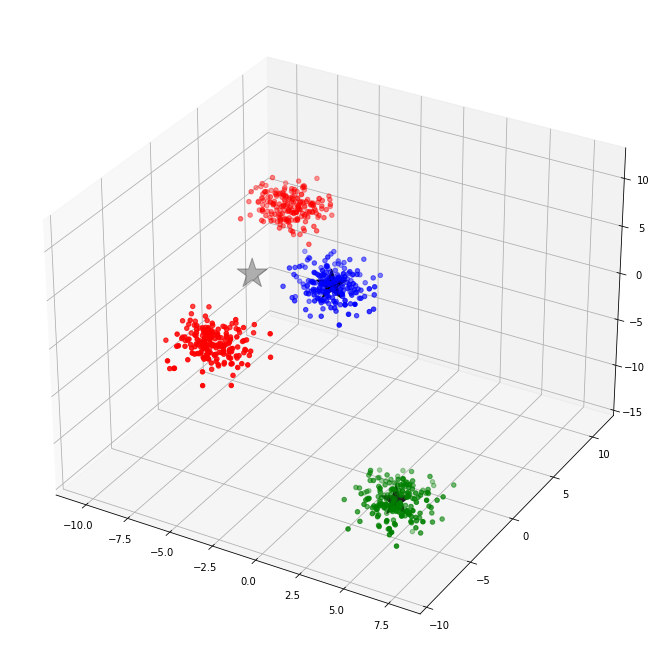

In [42]:
colors = ['r', 'g', 'b', 'y', 'c', 'm'] 
fig = plt.figure()
ax = Axes3D(fig)

for i in range(k):
    points = np.array([x[j] for j in range(len(x)) if labels[j] == i])
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors[i])
    
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

7. Change the cluster number (i.e., the k value used in step 4), re-run step 4 - 6,
and check the differences in the results.

(e.g., let K = 2, 4, 5, etc.)

In [44]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
    # calculate square of Euclidean distance of each point 
    # from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0]-curr_center[0])** 2+(points[i, 1]-curr_center[1])**2

        sse.append(curr_sse)
    return sse

8. Choosing the value of K

In some case, we know how many clusters exist in the data, then we directly use
the value of K in the algorithm. While, in other cases, the number of clusters is
not provided. Then how can we decide the value of K? there are two major
methods that can be useful to find this mysterious K in K-means:

• The Elbow Method
• The Silhouette Method

In this task, we will try how to use the Elbow method to select the value of K.

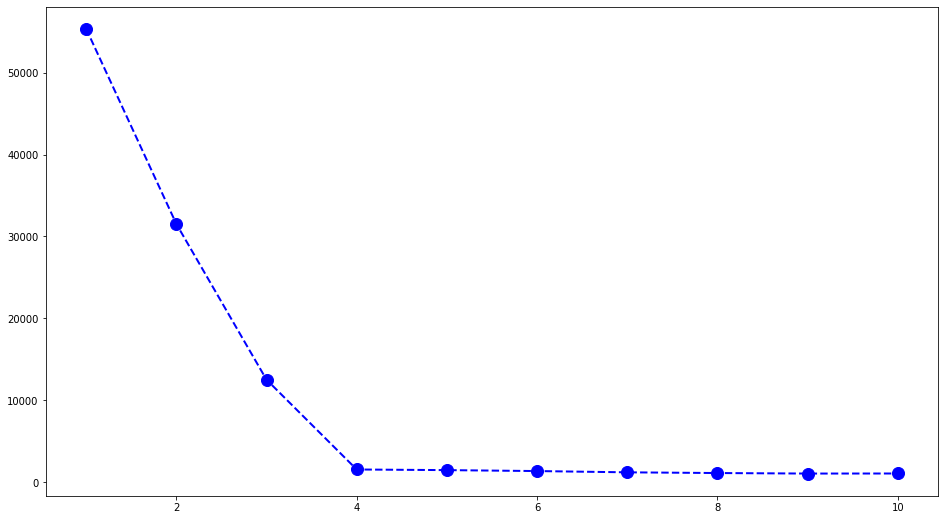

In [46]:
k_Max = 10
SSE = calculate_WSS(x, k_Max)
t = range(1, k_Max+1)

fig = plt.figure()
plt.plot(t, SSE, 'bo--', linewidth=2, markersize=12)